DATASET URL:https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,ZeroPadding2D,BatchNormalization,Activation,Add,AveragePooling2D,Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.initializers import glorot_uniform

In [ ]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/MyDrive/archive (1).zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

Streaming output truncated to the last 5000 lines.
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png 2019-10-14 08:19:22         8513
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png 2019-10-14 08:19:22        11145
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png 2019-10-14 08:19:22        11113
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png 2019-10-14 08:19:22        11492
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png 2019-10-14 08:19:22        10545
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png 2019-10-14 08:19:22         9976
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png 2019-10-14 08:19:22        11303
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png 2019-10-14 08:19:22         8894
cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102

In [ ]:
os.makedirs('train/Uninfected')
os.makedirs('train/Parasitized')

os.makedirs('test/Uninfected')
os.makedirs('test/Parasitized')

In [ ]:
# Function to split source data into train and test
def split_data(class_source_path, class_train_path, class_test_path, test_size):
    for i, src_img_name in enumerate(os.listdir(class_source_path), start=1):
        src_url = os.path.join(class_source_path, src_img_name)
        src_img = open(src_url, 'rb')
        if '.png' in src_img_name.lower():   
            if i <= test_size:
                dest_url = os.path.join(class_test_path,'{}.png'.format(i))
            else:
                dest_url = os.path.join(class_train_path,'{}.png'.format(i))
            dest_img = open(dest_url, 'wb')
            dest_img.write(src_img.read())
            src_img.close()
            dest_img.close()
        else:
            print("Invalid image : ",src_url)

In [ ]:
TEST_SIZE = 3780

source_parasitized = '/content/cell_images/Parasitized/'
train_parasitized ='train/Parasitized/'
test_parasitized = 'test/Parasitized/'
split_data(source_parasitized, train_parasitized, test_parasitized, test_size=TEST_SIZE)

Invalid image :  /content/cell_images/Parasitized/Thumbs.db


In [ ]:
source_uninfected = '/content/cell_images/Uninfected/'
train_uninfected = 'train/Uninfected/'
test_uninfected = 'test/Uninfected/'
split_data(source_uninfected, train_uninfected, test_uninfected, test_size=TEST_SIZE)

Invalid image :  /content/cell_images/Uninfected/Thumbs.db


In [ ]:
# Overview of train and test datasets
print("Train parasitized images :",len(os.listdir(train_parasitized)))
print("Train uninfected images :",len(os.listdir(train_uninfected)))
print("Total training images :",len(os.listdir(train_parasitized))+ len(os.listdir(train_uninfected)))
print()
print("Test parasitized images :",len(os.listdir(test_parasitized)))
print("Test uninfected images :",len(os.listdir(test_uninfected)))
print("Total testing images :",len(os.listdir(test_parasitized))+ len(os.listdir(test_uninfected)))

Train parasitized images : 10000
Train uninfected images : 10000
Total training images : 20000

Test parasitized images : 3779
Test uninfected images : 3779
Total testing images : 7558


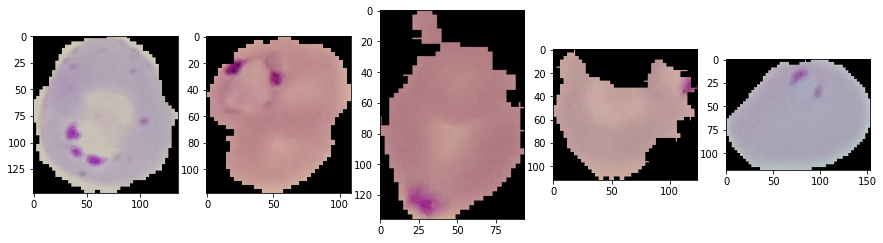

In [ ]:
#Dispalying Parasitized images
f,axes = plt.subplots(1,5, figsize=(15,4))
images = os.listdir(train_parasitized)[:5] # 5 images
for i, img in enumerate(images):
    img = plt.imread(os.path.join(train_parasitized,img))
    axes[i].imshow(img)

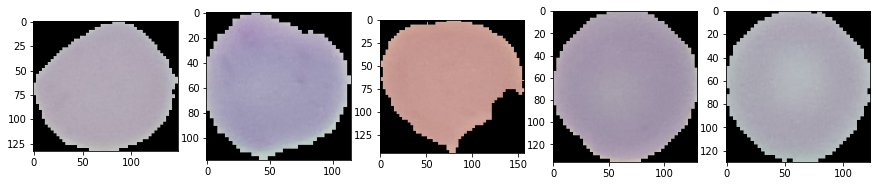

In [ ]:
#Displaying uninfected images
f,axes = plt.subplots(1,5, figsize=(15,4))
images = os.listdir(train_uninfected)[:5]
for i, img in enumerate(images):
    img = plt.imread(os.path.join(train_uninfected,img))
    axes[i].imshow(img)

In [ ]:
TRAIN_PATH = 'train'
TEST_PATH = 'test'
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(directory=TRAIN_PATH,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,class_mode='categorical',shuffle=True)
testing_set = test_datagen.flow_from_directory(directory=TEST_PATH,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,class_mode='categorical',shuffle=True)

Found 20000 images belonging to 2 classes.
Found 7558 images belonging to 2 classes.


In [ ]:
print(training_set.class_indices)
print(testing_set.class_indices)

{'Parasitized': 0, 'Uninfected': 1}
{'Parasitized': 0, 'Uninfected': 1}


In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    X=Flatten()(X)
    X=Dense(512,activation='relu')(X)
    X=Dropout(0.25)(X)
    X=Dense(2,activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model


In [ ]:
model_resnet50 = ResNet50(input_shape=(224, 224, 3))

In [ ]:
model_resnet50.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

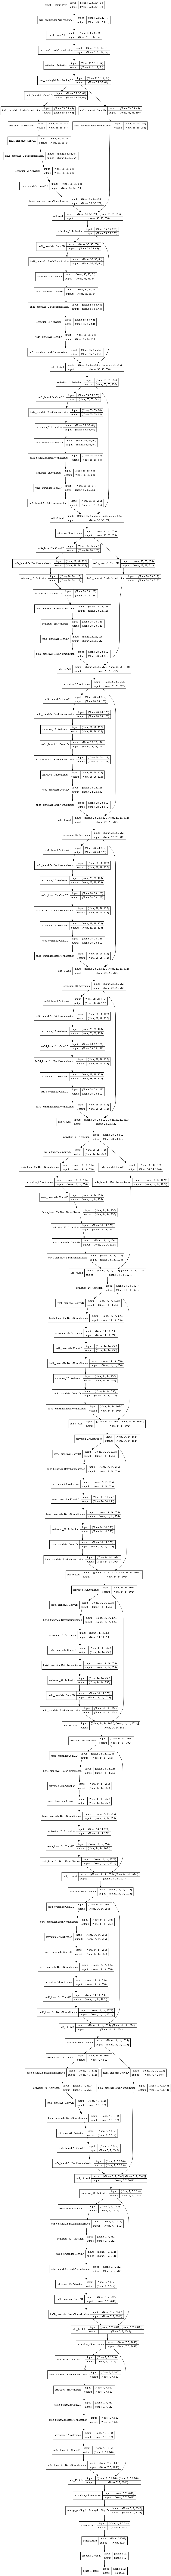

In [ ]:
tf.keras.utils.plot_model(model_resnet50,show_shapes=True, show_layer_names=True)

In [ ]:
model_resnet50.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_resnet50 = model_resnet50.fit_generator(training_set,validation_data=testing_set,epochs=10,steps_per_epoch=len(training_set),
                                    validation_steps=len(testing_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
625/625 [==============================] - 343s 488ms/step - loss: 4.5103 - accuracy: 0.6050 - val_loss: 0.8193 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 305s 488ms/step - loss: 0.2086 - accuracy: 0.9390 - val_loss: 0.1934 - val_accuracy: 0.9440
Epoch 3/10
625/625 [==============================] - 306s 490ms/step - loss: 0.1703 - accuracy: 0.9506 - val_loss: 0.1767 - val_accuracy: 0.9501
Epoch 4/10
625/625 [==============================] - 307s 491ms/step - loss: 0.1694 - accuracy: 0.9494 - val_loss: 0.1571 - val_accuracy: 0.9530
Epoch 5/10
625/625 [==============================] - 306s 490ms/step - loss: 0.1603 - accuracy: 0.9525 - val_loss: 0.1668 - val_accuracy: 0.9512
Epoch 6/10
625/625 [==============================] - 305s 488ms/step - loss: 0.1513 - accuracy: 0.9552 - val_loss: 0.2106 - val_accuracy: 0.9439
Epoch 7/10
625/625 [==============================] - 305s 487ms/step - loss: 0.1570 - accuracy: 0.9532 - val_loss: 0.1774 -

In [ ]:
model_resnet50.save("/content/drive/MyDrive/malaria detection/weights/resnet50.h5")

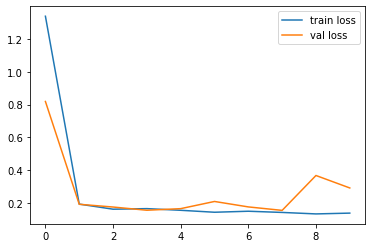

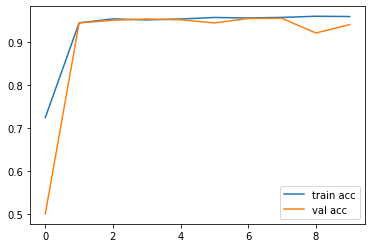

In [ ]:
# plot the loss
plt.plot(history_resnet50.history['loss'], label='train loss')
plt.plot(history_resnet50.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history_resnet50.history['accuracy'], label='train acc')
plt.plot(history_resnet50.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()